# Setting up your computer
If you aren’t already setup with Python and Jupyter Notebook or JupyterLab please install either Anaconda or Miniconda. I would recommend installing Miniconda. Anaconda is more user friendly but is a huge application. Miniconda is less user friendly but much lighter (basically installs Python and Conda for managing packages). Anaconda is a much heavier application because it installs pretty much every module you will ever need. With Miniconda you will likely need to import additional modules as you go. I would recommend Miniconda - instructions below.

*Instructions before the session*
1. Go to … and download the file … .ipynb and the requirements.txt file and add them to an empty project directory folder called `PythonBootcamp`
2. Go to Kaggle and download the [New York City Airbnb Open Data](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/version/3#). Unzip the files and place them in the `data` folder within `PythonBootcamp`. You may need to create a kaggle account to download the data (this is worthwhile regardless as it is a great source for data and learning). 

*If you want to install Anaconda instead of Miniconda, skip to step 4. If you already have Miniconda installed, skip to step 3.*

2. If you haven’t already got Miniconda please install Miniconda it for Python 3.7 from https://docs.conda.io/en/latest/miniconda.html (keep all default options)
3. Once installed, open `anaconda prompt (miniconda3)` by pressing the Windows button and searching ` anaconda prompt`.
4. Navigate to the `PythonBootcamp` directory using `cd` commands
5. Once in the Python directory run the command `conda install -c conda-forge --file requirements.txt -y` from the anaconda prompt to install all modules required during this bootcamp - this may take some time. If you get the error 'CondaHTTPError: HTTP 000 CONNECTION FAILED ...' see the **EY network issue.** below.
6. Run the command `jupyter lab`. This should open a new browser running JupyterLab (https://jupyterlab.readthedocs.io/en/stable/). You can use either JupyterLab or Jupyter Notebook (by running `jupyter notebook`), JupyterLab is just a better version of Jupyter Notebook (in my opinion).

Miniconda setup:
1.	
2.	
When going through the installation steps add Python to path

**EY network issue.** 

If you are getting the error 'CondaHTTPError: HTTP 000 CONNECTION FAILED ...' this is because the EY network is blocking the anaconda (and pip) online repo.
To get around network issues, we use the EY proxies. These are set as environement variables during a session by running the two command below:
```
SET http_proxy=http://empweb2.ey.net:8080
SET https_proxy=https://empweb2.ey.net:8443
```
Once set commands such as `conda install <module>` should work. Unfortunetly you will have to set these every time you open a new session (open a new Anaconda Prompt).


## Bootcamp aims:
We are going to be using an open Airbnb dataset on NewYork listings to learn how to:  
- Load and manipulate data in Pandas
- Visulise and analyse data using Matplotlib and Seaborn
- Create interactive plots using Plotly
- Mock-up a Dashboard web application using Dash

#### Data source
The data source we are going to use is currently the 'hottest' in [Kaggle](https://www.kaggle.com/datasets). It is the New York City Airbnb Open Data for 2019 and it is avaliable [here](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data). 

#### 1. Load and manipulate data
Pandas is all that is required to do most data manipulations. It is extremely fast and reliable. There is a book explaining the library [here](https://jakevdp.github.io/PythonDataScienceHandbook/)

In [3]:
##  all these common imports are renamed in shorthand, this is standard practice 

# data reading, cleaning and manupulation:
import pandas as pd 

# plotting:
import matplotlib.pyplot as plt 
# setting so plots will be displayed below the cell (magic function)
%matplotlib inline 
import seaborn as sns

In [4]:
# pandas read_csv function with no additional columns
df_NY = pd.read_csv('data/AB_NYC_2019.csv')
# view top 3
df_NY.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [59]:
# some observations about the data

print("There are {} observations and {} features in this dataset. \n".format(df_NY.shape[0],df_NY.shape[1]))

print("There are {} types unique host_name's in this dataset such as: {}... \n".format(len(df_NY['host_name'].unique()),
                                                                           ", ".join(df_NY['host_name'].unique()[0:5])))

print("There are {} neighbourhood_group's in this dataset: {} \n".format(len(df_NY['neighbourhood_group'].unique()),
                                                                                      ", ".join(df_NY['neighbourhood_group'].unique()[0:6])))

print("There are {} neighbourhood's in this dataset such as: {}... \n".format(len(df_NY['neighbourhood'].unique()),
                                                                                      ", ".join(df_NY['neighbourhood'].unique()[0:5])))

There are 48895 observations and 16 features in this dataset. 

There are 11453 types unique host_name's in this dataset such as: John, Jennifer, Elisabeth, LisaRoxanne, Laura... 

There are 5 neighbourhood_group's in this dataset: Brooklyn, Manhattan, Queens, Staten Island, Bronx 

There are 221 neighbourhood's in this dataset such as: Kensington, Midtown, Harlem, Clinton Hill, East Harlem... 



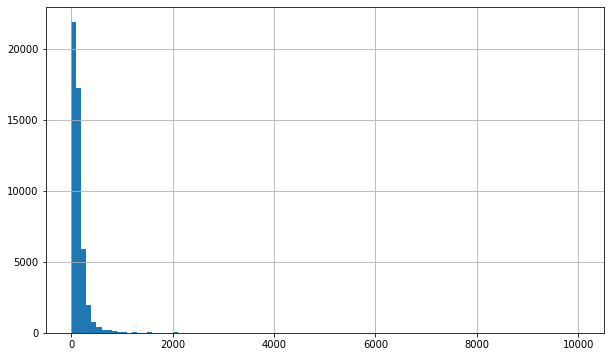

In [67]:
# quick histogram
df_NY['price'].hist(
    bins=100,
    figsize=(10,6));

In [3]:
# check data types
df_NY.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

##### Column 'last_review' has been interpreted incorrectly

This should have been interpreted as a datetime. To transform can use pandas [to_datetime()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) function  

In [4]:
# read as datetime
df_NY['last_review'] = pd.to_datetime(df_NY['last_review'])
df_NY.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

##### With hindsight can adjust read_csv

In [5]:
# the change could then be added to the read_csv() function above 
df_NY = pd.read_csv('data/AB_NYC_2019.csv', parse_dates = ['last_review'])
df_NY.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [6]:
# word cloud for airbnb names
df_NY['name']

0                       Clean & quiet apt home by the park
1                                    Skylit Midtown Castle
2                      THE VILLAGE OF HARLEM....NEW YORK !
3                          Cozy Entire Floor of Brownstone
4         Entire Apt: Spacious Studio/Loft by central park
                               ...                        
48890      Charming one bedroom - newly renovated rowhouse
48891        Affordable room in Bushwick/East Williamsburg
48892              Sunny Studio at Historical Neighborhood
48893                 43rd St. Time Square-cozy single bed
48894    Trendy duplex in the very heart of Hell's Kitchen
Name: name, Length: 48895, dtype: object

In [7]:
# standardise names
ex_name = df_NY['name'][2]
print("\""+ex_name+"\"")
print("Want to lowercase and remove punctuation...")
print("Use .lower() to lower case: \"%s\"" %(ex_name.lower()))
print("Use regular expression to remove punctuation and replace with space... ")

# regular expression
import re
ex_name_cln = re.sub(
    r"[,.;@#?!&$/:]+\ *", # Accept one or more copies of punctuation plus zero or more copies of a space
    " ", # replace with space
    ex_name.lower()) # lowercase

print("Cleaned string: \"%s\"" %(ex_name_cln))

"THE VILLAGE OF HARLEM....NEW YORK !"
Want to lowercase and remove punctuation...
Use .lower() to lower case: "the village of harlem....new york !"
Use regular expression to remove punctuation and replace with space... 
Cleaned string: "the village of harlem new york  "


In [32]:
# combine into a single function
def lower_clean_punc(text):
    try:
        clean = re.sub(
            r"[,.;@#?!&$/:-]+\ *", 
            " ", 
            text.lower() # lowercase
        )
    # handle errors due to NaN
    except:
        clean = ""
    return clean

# apply function to every row using apply
df_NY['name_cln'] = df_NY['name'].apply(lower_clean_punc)

#### Word cloud

**Google how to make a word cloud from a pandas dataframe and install additional modules if required**

Word cloud example - https://www.datacamp.com/community/tutorials/wordcloud-python

Wordcloud installation and documentation - https://anaconda.org/conda-forge/wordcloud

In most instances, to install additional modules run `conda install -c conda-forge <module>`


In [33]:
split_names = df_NY['name_cln'].str.split(" ").values

In [34]:
# get flat list of all words in name
flat_list = []
for sublist in split_names:
    for item in sublist:
        # if not blank... add
        if item!='':
            flat_list.append(item)

In [41]:
pd.Series(flat_list).value_counts()

in             16771
room           10162
bedroom         8165
private         7324
apartment       6733
               ...  
安静                 1
belleharbor        1
britney            1
"library"          1
✌✌✌                1
Length: 10668, dtype: int64

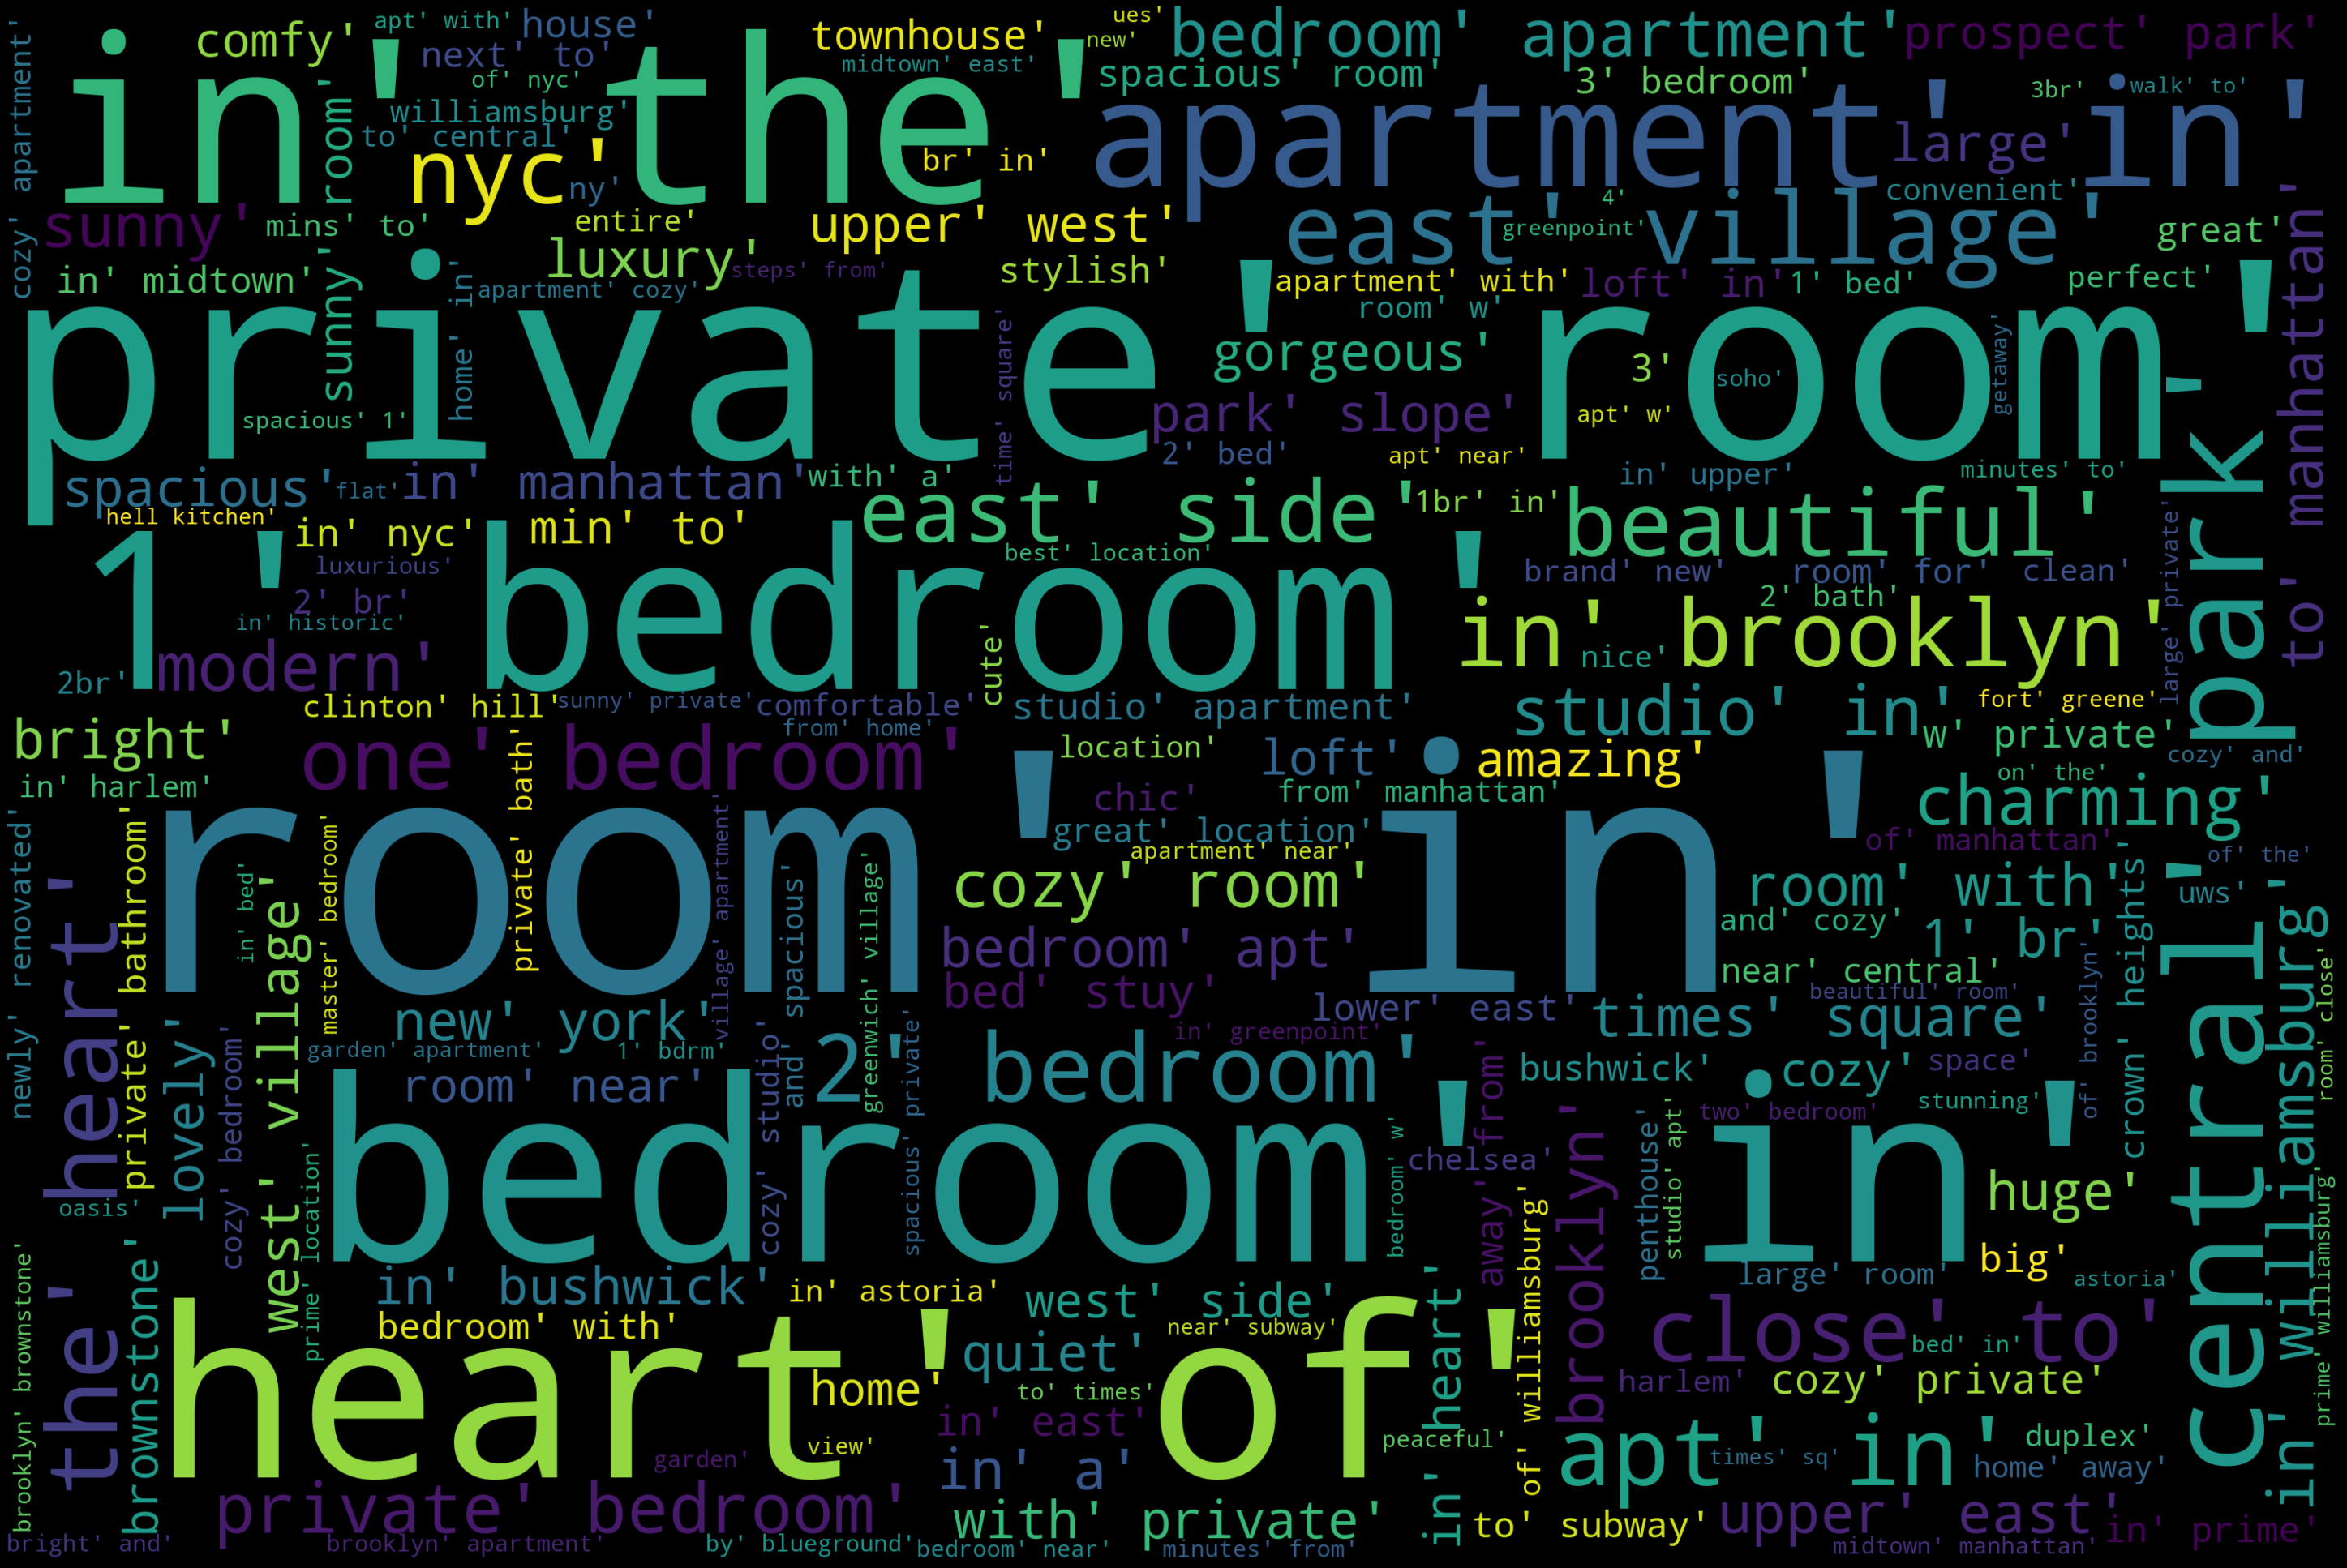

In [42]:
from wordcloud import WordCloud, STOPWORDS

text = flat_list
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### 2. Load and manipulate data

In [ ]:
# use seaborn
import seaborn as sns

In [ ]:
df_NY['price']